<a href="https://colab.research.google.com/github/AbderrahmaneGuermat/COVID-19-CLASSIFICATION-IMAGES/blob/master/Detecci%C3%B3n_Covid_19_Mediante_Lenet_5%2C_AlexNet_5%2C_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest X-Ray dataset with LeNet 5

## Chest X-Ray

Methods to diagnose pneumonia using chest x-ray images (<https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia>)

In this case, the purpose is to classify the level of pneumonia in a given image.

Trains a simple LeNet-5 (http://yann.lecun.com/exdb/lenet/) adapted to the `Chest X-Ray` dataset using Keras Software (http://keras.io/)

LeNet-5 demo example http://eblearn.sourceforge.net/beginner_tutorial2_train.html


## Local instalation

 ### Install the following Python packages to run this notebook

`pip install pip -U`

`pip install keras tensorflow pillow h5py sklearn jupyter`

## Google Colab

[Google Colab](https://colab.research.google.com/) is a research project created to help disseminate machine learning education and research. It's a `Jupyter notebook` environment that requires no setup to use and runs entirely in the cloud.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

### How install extra packages
Google Colab installs a series of basic packages if we need any additional package just install it.

In [ ]:
!pip install -q keras h5py sklearn shap

     |████████████████████████████████| 564 kB 4.2 MB/s 


## Copy dataset to Colab

In [ ]:
!wget https://www.dlsi.ua.es/~juanra/UA/datasets/chest_xray_512.zip

--2021-12-07 10:27:25--  https://www.dlsi.ua.es/~juanra/UA/datasets/chest_xray_512.zip
Resolving www.dlsi.ua.es (www.dlsi.ua.es)... 193.145.231.28
Connecting to www.dlsi.ua.es (www.dlsi.ua.es)|193.145.231.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254353384 (243M) [application/zip]
Saving to: ‘chest_xray_512.zip’

chest_xray_512.zip  100%[===================>] 242.57M  9.17MB/s    in 29s     

2021-12-07 10:27:55 (8.40 MB/s) - ‘chest_xray_512.zip’ saved [254353384/254353384]



If we use an uploaded compress file we can uncompress with:

In [ ]:
!unzip -q chest_xray_512.zip
!ls

chest_xray_512	chest_xray_512.zip  sample_data


## Import packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers

## Define global constants

Lets start with 50 epochs to test learning network parameters

In [ ]:
batch_size = 64
nb_classes = 2
epochs = 50

# Scaling input image to theses dimensions
img_rows, img_cols = 32, 32

## Load image database

In [ ]:
#
#	Load data from data/chest_xray_512/ NORMAL (0) PNEUMONIA(1)
#
name_classes = ['NORMAL','PNEUMONIA']
def load_data():
  X,y  = [], []
  for class_number, class_name in enumerate(name_classes):    # Number of directories
    for filename in glob.glob(f'./chest_xray_512/{class_name}/*.jpg'):
      im = image.load_img(filename, target_size=[img_rows, img_cols], color_mode = 'grayscale')
      X.append(image.img_to_array(im))
      y.append(class_number)

  input_shape = (img_rows, img_cols, 1)
  X=np.array(X)
  y=np.array(y)
  X=X/255
  return X,y, input_shape

In [ ]:
#
#	Load data from data/chest_xray_512/ NORMAL (0) PNEUMONIA(1)
#
name_classes = ['NORMAL','PNEUMONIA']
def load_data_Equalized():
  X,y  = [], []
  X2,y2 =[], []
  for class_number, class_name in enumerate(name_classes):    # Number of directories
    for filename in glob.glob(f'./chest_xray_512/{class_name}/*.jpg'):
      im = image.load_img(filename, target_size=[img_rows, img_cols], color_mode = 'grayscale')
      if class_number == 0:
        X.append(image.img_to_array(im))
        y.append(class_number)
      else:
        X2.append(image.img_to_array(im))
        y2.append(class_number)

  input_shape = (img_rows, img_cols, 1)
  X=np.array(X)
  y=np.array(y)
  X2=np.array(X2)
  y2=np.array(y2)
  X=X/255
  X2=X2/255
  return X,y,X2,y2

## Plot images

In [ ]:
def plot_symbols(X,y,n=15):
    index = np.random.randint(len(y), size=n)
    plt.figure(figsize=(n, 3))
    for i in np.arange(n):
        ax = plt.subplot(1,n,i+1)
        plt.imshow(X[index[i],:,:,0])
        plt.gray()
        ax.set_title('{}-{}'.format(y[index[i]],index[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## Build LeNet5 structure

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/LeNet5.jpg"></center>

In [ ]:
#
# Build an ANN structure - LeNet5
#

def cnn_model(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes

    model.add(layers.Conv2D(6, (5, 5)))
    model.add(layers.Activation("sigmoid"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(16, (5, 5)))
    model.add(layers.Activation("sigmoid"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120))
    model.add(layers.Activation("sigmoid"))
    
    model.add(layers.Dense(84))
    model.add(layers.Activation("sigmoid"))
    
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

## Start to run the program

### Load data

In [ ]:
##################################################################################
# Main program

X, y, input_shape = load_data()
#X/=255

print(X.shape, 'train samples')
print(img_rows,'x', img_cols, 'image size')
print(input_shape,'input_shape')
print(epochs,'epochs')

(5856, 32, 32, 1) train samples
32 x 32 image size
(32, 32, 1) input_shape
50 epochs


### Let to see examples of the dataset

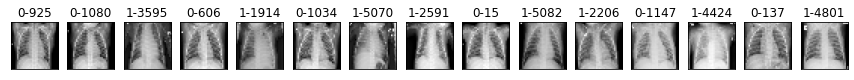

In [ ]:
plot_symbols(X, y)

## Number of examples per class

In [ ]:
import collections

collections.Counter(y)

Counter({0: 1583, 1: 4273})

## Split examples in training/test sets

In [ ]:
# CNN layer need an additional chanel to colors (32 x 32 x 1)
print('N samples, witdh, height, channels',X.shape)

N samples, witdh, height, channels (5856, 32, 32, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(f'x_train {X_train.shape} x_test {X_test.shape}')
print(f'y_train {y_train.shape} y_test {y_test.shape}')

x_train (4392, 32, 32, 1) x_test (1464, 32, 32, 1)
y_train (4392,) y_test (1464,)


### Model and optimizers

Test [optimizer](https://keras.io/optimizers/) parameter with `sgd`, `adadelta` or `adam` values in order to check the final precision achieved.

In [ ]:
#model = cnn_model(input_shape)
#print(model.summary())

#model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])

> **Questions**:
 - What is `sparse_categorical_crossentropy` for? 
 - And if we use `categorical_crossentropy`, what good would it do?

In [ ]:
#loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
#print(f'loss: {loss:.2f} acc: {acc:.2f}')

## Prediction

### Testing AUC result for two classes

In [ ]:
from sklearn.metrics import roc_auc_score

#
# Results AUC (Area Under ROC)
#

#y_pred = model.predict(X_test) #Extract prediction per sample and class
#print(f'AUC {roc_auc_score(y_test, y_pred[:,1], ):.4f}')

**Note**: If multiple classes (>2) are used, the parameter 'multi_class' = 'ovr' (over-vs-rest) should be used.



```
# Tiene formato de código
```

## More metrics about results

We can find more information about `precision`, `recall` and `f1` metrics in <https://en.wikipedia.org/wiki/Precision_and_recall>.

In [ ]:
#print('Predictions')
#print(collections.Counter(y_pred_int))

#print('Confusion matrix')
#print(metrics.confusion_matrix(y_test,y_pred_int))

#print(metrics.classification_report(y_test, y_pred_int, target_names=['Normal','Pneumonia']))

# DATAGENERATOR FOR AUGMENTATION

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import copy
def datagenerator_augmentation(X_train,X_test,y_train,y_test,batch_size):
    train_datagenerator = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=30, fill_mode='nearest',
        width_shift_range=0.2, height_shift_range=0.2,
        horizontal_flip=True, vertical_flip=True,
        brightness_range=[0.4,1.5],
        zoom_range=[0.5, 2],
        shear_range=45.0
        )
    #augmented_X_train = copy.deepcopy(X_train)
    #augmented_y_train = copy.deepcopy(y_train)
    augmented_X_train = ([])
    augmented_y_train = ([])
    j=0
    for j in range(3):
      train_Actualized = train_datagenerator.flow(X_train,y_train,batch_size=1)
      i=0
      for im in train_Actualized: 
          augmented_X_train.append(im[0][0])
          augmented_y_train.append(im[1][0])
          #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0)
          #augmented_X_train=np.insert(augmented_X_train,len(augmented_X_train),im[0][0],axis = 0)
          #augmented_y_train=np.insert(augmented_y_train,len(augmented_y_train),im[1][0],axis = 0)
          i += 1
          if i > len(X_train)-1:
              break
      j += 1
      if j > 2:
          break
    #test_datagenerator = ImageDataGenerator(rescale=1.0/255)
    #test_Actualized =  test_datagenerator.flow(X_test,y_test,batch_size=batch_size)
    #return (train_Actualized, test_Actualized)
    augmented_X_train = np.array(augmented_X_train)
    augmented_y_train = np.array(augmented_y_train)
    #return np.array(augmented_X_train), np.array(augmented_y_train)
    augmented_X_train=np.append(X_train,augmented_X_train, axis=0)
    augmented_y_train=np.append(y_train,augmented_y_train, axis=0)
    return augmented_X_train,augmented_y_train

x_train (4392, 32, 32, 1) x_test (1464, 32, 32, 1)
y_train (4392,) y_test (1464,)
(32, 32, 1)
x_train (17568, 32, 32, 1)
y_train (17568,)
(32, 32, 1)


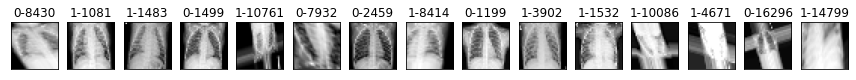

In [ ]:
#PRUEBA DE AUMENTADO DE DATOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(f'x_train {X_train.shape} x_test {X_test.shape}')
print(f'y_train {y_train.shape} y_test {y_test.shape}')
print(X_train[0].shape)
augmented_X_train, augmented_y_train = datagenerator_augmentation(X_train,X_test,y_train,y_test,batch_size)
print(f'x_train {augmented_X_train.shape}')
print(f'y_train {augmented_y_train.shape}')
print(augmented_X_train[0].shape)
plot_symbols(augmented_X_train, augmented_y_train)

In [ ]:
def datagenerator_augmentation2(X_train,X_test,y_train,y_test,batch_size):
    train_datagenerator = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=30, fill_mode='nearest',
        width_shift_range=0.2, height_shift_range=0.2,
        horizontal_flip=True, vertical_flip=True,
        brightness_range=[0.4,1.5],
        zoom_range=[0.5, 2],
        shear_range=45.0
        )
    #augmented_X_train = copy.deepcopy(X_train)
    #augmented_y_train = copy.deepcopy(y_train)
    augmented_X_train = ([])
    augmented_y_train = ([])
    j=0
    for j in range(2):
      train_Actualized = train_datagenerator.flow(X_train,y_train,batch_size=1)
      i=0
      for im in train_Actualized: 
          augmented_X_train.append(im[0][0])
          augmented_y_train.append(im[1][0])
          #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0)
          #augmented_X_train=np.insert(augmented_X_train,len(augmented_X_train),im[0][0],axis = 0)
          #augmented_y_train=np.insert(augmented_y_train,len(augmented_y_train),im[1][0],axis = 0)
          i += 1
          if i > len(X_train)-1:
              break
      j += 1
      if j > 2:
          break
    #test_datagenerator = ImageDataGenerator(rescale=1.0/255)
    #test_Actualized =  test_datagenerator.flow(X_test,y_test,batch_size=batch_size)
    #return (train_Actualized, test_Actualized)
    augmented_X_train = np.array(augmented_X_train)
    augmented_y_train = np.array(augmented_y_train)
    #return np.array(augmented_X_train), np.array(augmented_y_train)
    augmented_X_train=np.append(X_train,augmented_X_train, axis=0)
    augmented_y_train=np.append(y_train,augmented_y_train, axis=0)
    return augmented_X_train,augmented_y_train

# MODEL FOR 3 CLASSES SELECTION

In [ ]:
def for3_model(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes

    model.add(layers.Conv2D(6, (5, 5)))
    model.add(layers.Activation("sigmoid"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(16, (5, 5)))
    model.add(layers.Activation("sigmoid"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120))
    model.add(layers.Activation("sigmoid"))
    
    model.add(layers.Dense(84))
    model.add(layers.Activation("sigmoid"))
    
    model.add(layers.Dense(3))
    model.add(layers.Activation('softmax'))

    return model

# MODELO 1

In [ ]:
# Build an ANN structure - LeNet5
# Misma estructura LeNet5 inicial 
# Variando las funciones de activacion: Tanh

def cnn_model_Tanh(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes

    model.add(layers.Conv2D(6, (5, 5)))
    model.add(layers.Activation("tanh"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(16, (5, 5)))
    model.add(layers.Activation("tanh"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120))
    model.add(layers.Activation("tanh"))
    
    model.add(layers.Dense(84))
    model.add(layers.Activation("tanh"))
    
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

# MODELO 2

In [ ]:
# Build an ANN structure - LeNet5
# Misma estructura LeNet5 inicial 
# Variando las funciones de activacion: Relu

def cnn_model_Relu(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes

    model.add(layers.Conv2D(6, (5, 5)))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(16, (5, 5)))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120))
    model.add(layers.Activation("relu"))
    
    model.add(layers.Dense(84))
    model.add(layers.Activation("relu"))
    
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

# MODELO 3

In [ ]:
# Build an ANN structure - LeNet5
# Misma estructura LeNet5 inicial 
# Variando las funciones de activacion: Leaky_Relu
# preguntar por prerelu y elu y selu ??
from tensorflow.keras.layers import LeakyReLU
leaky_relu = LeakyReLU(alpha=0.01)
def cnn_model_LeakyRelu(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes

    model.add(layers.Conv2D(6, (5, 5)))
    model.add(layers.Activation("leaky_relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(16, (5, 5)))
    model.add(layers.Activation("leaky_relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120))
    model.add(layers.Activation("leaky_relu"))
    
    model.add(layers.Dense(84))
    model.add(layers.Activation("leaky_relu"))
    
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

# Modelo 4

In [ ]:
# Build an ANN structure - Alex-Net

def cnn_model_AlexNet(input_shape_AlexNet):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes
    #1º capa
    model.add(layers.Conv2D(filters=96,input_shape=input_shape_AlexNet, kernel_size=(11,11), strides=(4,4), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='same'))
    
    #2º capa
    model.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='same'))

    #3º capa
    model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    

    #4º capa
    model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    

    #5º capa
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='same'))

    model.add(layers.Flatten())

    model.add(layers.Dense(4096,input_shape=input_shape_AlexNet))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.4))
   
    model.add(layers.Dense(4096))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.4))

    model.add(layers.Dense(1000))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.4))

    model.add(layers.Dense(nb_classes)) #cambiar por 2
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('softmax'))

    return model
    

# MODELO 5

In [ ]:
# Build an ANN structure - Random CNN


def cnn_model_5_Random(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes

    model.add(layers.Conv2D(filters= 10, kernel_size= 2))
    model.add(layers.Activation("relu"))
    
    model.add(layers.Conv2D(filters= 10, kernel_size= 2))
    model.add(layers.Activation("relu"))

    model.add(layers.Conv2D(filters= 10, kernel_size= 2))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

#  MODELO 5 API FUNCIONAL

In [ ]:
# Build an ANN structure - Random CNN


def cnn_model_5_RandomFuncional(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes

    model.add(layers.Conv2D(filters= 10, kernel_size= 2))
    model.add(layers.Activation("relu"))
    
    model.add(layers.Conv2D(filters= 10, kernel_size= 2))
    model.add(layers.Activation("relu"))

    model.add(layers.Conv2D(filters= 10, kernel_size= 2))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))
   ###################
    inputs=keras.Input(shape=input_shape)
    
    x=layers.Conv2D(filters= 10, kernel_size= 2)(inputs)
    x=layers.Activation("relu")(x)

    x=layers.Conv2D(filters= 10, kernel_size= 2)(x)
    x=layers.Activation("relu")(x)

    x=layers.Conv2D(filters= 10, kernel_size= 2)(x)
    x=layers.Activation("relu")(x)
    x=layers.MaxPooling2D(pool_size=(2, 2))(x)

    x=layers.Flatten()(x)

    outputs = layers.Dense(nb_classes, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model

# MODELO 6

In [ ]:
# Build an ANN structure - Random CNN


def cnn_model_6_Random(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes

    model.add(layers.Conv2D(filters= 32, kernel_size= 3))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=2))
  

    
    model.add(layers.Conv2D(filters= 32, kernel_size= 3))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=2))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128))
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

# Modelo 6 Api Funcional

In [ ]:
# Build an ANN structure - Random CNN


def cnn_model_6_RandomFuncional(input_shape):
    #
    # Neural Network Structure
    #
    
    inputs=keras.Input(shape=input_shape)
    x=layers.Conv2D(filters= 32, kernel_size= 3)(inputs)
    x=layers.Activation("relu")(x)
    x=layers.MaxPooling2D(pool_size=(2, 2),strides=2)(x)

    x=layers.Conv2D(filters= 32, kernel_size= 3)(x)
    x=layers.Activation("relu")(x)
    x=layers.MaxPooling2D(pool_size=(2, 2),strides=2)(x)

    x=layers.Flatten()(x)
    x=layers.Dense(128)(x)
    x=layers.Activation('relu')(x)

    outputs = layers.Dense(nb_classes, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

# MODELO 7

In [ ]:
# Build an ANN structure - VGG

def cnn_model_VGG(input_shape_VGG):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes
    
    model.add(layers.Conv2D(filters=64,input_shape=input_shape_VGG, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    
    model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(4096))
    model.add(layers.Activation("relu"))

    model.add(layers.Dense(4096))
    model.add(layers.Activation("relu"))
   
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

# MODELO 8

In [ ]:
# Build an ANN structure - VGG TRAINED

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

def cnn_model_VGG_Trained(input_shape_VGG):
    #
    # Neural Network Structure
    #
    vgg = VGG16(input_shape = input_shape_VGG, 
            weights = None,
            include_top=False)
    for layer in vgg.layers:
      layer.trainable = False
  
    x = layers.Flatten()(vgg.output)
    x = layers.Dense(1000, activation='relu')(x)
   
    prediction = layers.Dense(nb_classes, activation='softmax')(x)

    model = Model(inputs=vgg.input, outputs=prediction)
    
    return model

# Modelo 9

In [ ]:
# Build an ANN structure - Random CNN


def cnn_model_9_Random(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(filters= 32, kernel_size= 3))
    model.add(layers.Activation("relu"))
    model.add(layers.Flatten())
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes
    model.add(layers.Dense(128))
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

# MODELO 9 API FUNCIONAL

In [ ]:
# Build an ANN structure - Random CNN


def cnn_model_9_RandomFuncional(input_shape):
    #
    # Neural Network Structure
    #
    
    inputs=keras.Input(shape=input_shape)

    x=layers.Conv2D(filters= 32, kernel_size= 3)(inputs)
    x=layers.Activation("relu")(x)
    x=layers.Flatten()(x)
    x=layers.Dense(128)(x)

    outputs = layers.Dense(nb_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

# MODELO 10

In [ ]:
# Build an ANN structure - Random CNN


def cnn_model_10_Random(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Activation("relu"))
    model.add(layers.Flatten())
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes
    model.add(layers.Dense(128))
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model


# MODELO 10 API FUNCIONAL

In [ ]:
# Build an ANN structure - Random CNN


def cnn_model_10_RandomFuncional(input_shape):
    #
    # Neural Network Structure
    #
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Activation("relu"))
    model.add(layers.Flatten())
    ##model.add(layers.Rescaling(1./255)) preguntar si para las imagenes
    model.add(layers.Dense(128))
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))


    inputs=keras.Input(shape=input_shape)

    x=layers.Activation("relu")(inputs)
    x=layers.Flatten()(x)
    x=layers.Dense(128)(x)

    outputs = layers.Dense(nb_classes, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

# LOAD DATA FOR 3 SELECTION

In [ ]:
#
#	Load data from data/chest_xray_512/ NORMAL (0) PNEUMONIA_Bact(1) PNEUMONIA_Viral(2)
#

def load_data_tres():
  name_classes = ['NORMAL','PNEUMONIA']
  X,y  = [], []
  for class_number, class_name in enumerate(name_classes):    # Number of directories
    for filename in glob.glob(f'./chest_xray_512/{class_name}/*.jpg'):
      im = image.load_img(filename, target_size=[img_rows, img_cols], color_mode = 'grayscale')
      X.append(image.img_to_array(im))
      if class_number == 0:
        y.append(class_number)
      else:
        if filename.find("bacteria") != -1:
          y.append(class_number)
        else:
          y.append(2)

  input_shape = (img_rows, img_cols, 1)

  X=np.array(X)
  y=np.array(y)
  X=X/255
  return X,y, input_shape

In [ ]:
X3, y3, input_shape3 = load_data_tres()
#X3/=255
print(X3.shape, 'samples')
print(y3.shape, 'labels')
print(input_shape3,'input_shape')

#collections.Counter(y3)

(5856, 32, 32, 1) samples
(5856,) labels
(32, 32, 1) input_shape


In [ ]:
#PROBAMOS A PASARLE AL MODELO INICIAL CLASIFICACION DE 3

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=123)

print(f'x_train {X_train3.shape} x_test {X_test3.shape}')
print(f'y_train {y_train3.shape} y_test {y_test3.shape}')

x_train (4392, 32, 32, 1) x_test (1464, 32, 32, 1)
y_train (4392,) y_test (1464,)


In [ ]:
#model3 = for3_model(input_shape)
#print(model3.summary())

#model3.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#model3.fit(X_train3, y_train3, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])

In [ ]:
#loss, acc = model3.evaluate(X_test3, y_test3, batch_size=batch_size)
#print(f'loss: {loss:.2f} acc: {acc:.2f}')

#
# Results AUC (Area Under ROC)
#

#y_pred3 = model3.predict(X_test3) #Extract prediction per sample and class
#y_pred3=keras.utils.to_categorical(y_pred3 , num_classes=3)
#roc_auc_for3=roc_auc_score(y_test3, y_pred3[:,1],multi_class='ovr')
#print(f'AUC {roc_auc_for3:.4f}')


# 10 CV Version 1 CODIGO INICIAL


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

"""model_10_CV_V1 = cnn_model(input_shape)
#print(model_10_CV_V1.summary())

model_10_CV_V1.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])
##kf10 = KFold(n_splits=10, shuffle=False)
##kf10 = StratifiedKFold(n_splits=10)
kf10 = StratifiedKFold(n_splits=10,shuffle=True)

acurracy_10CV_V1 = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
roc_10CV_V1 = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
i = 1
for train_index, test_index in kf10.split(X,y):
    X_train_10CV_V1= X[train_index]
    X_test_10CV_V1 = X[test_index]
    y_train_10CV_V1= y[train_index] 
    y_test_10CV_V1 = y[test_index]
  
    #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    model_10_CV_V1.fit(X_train_10CV_V1, y_train_10CV_V1, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])
    
    loss, acc = model_10_CV_V1.evaluate(X_test_10CV_V1, y_test_10CV_V1, batch_size=batch_size)
    print(f'loss for the fold {i}: {loss:.4f} acc for the fold {i}: {acc:.4f}')
    acurracy_10CV_V1[i-1]=acc
    #
    # Results AUC (Area Under ROC)
    #

    y_pred_10CV_V1 = model_10_CV_V1.predict(X_test_10CV_V1) #Extract prediction per sample and class
    roc_auc_value_10CV_V1=0
    try:
      roc_auc_value_10CV_V1=roc_auc_score(y_test_10CV_V1, y_pred_10CV_V1[:,1])
    except ValueError:
      pass
    print(f'AUC for the fold {i}: {roc_auc_value_10CV_V1:.4f}')
    roc_10CV_V1[i-1]= roc_auc_value_10CV_V1
    #print(f'AUC for the fold {i}: {roc_auc_score(y_test_10CV_V1, y_pred_10CV_V1[:,1], ):.4f}')
    i += 1"""

"model_10_CV_V1 = cnn_model(input_shape)\n#print(model_10_CV_V1.summary())\n\nmodel_10_CV_V1.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])\n##kf10 = KFold(n_splits=10, shuffle=False)\n##kf10 = StratifiedKFold(n_splits=10)\nkf10 = StratifiedKFold(n_splits=10,shuffle=True)\n\nacurracy_10CV_V1 = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])\nroc_10CV_V1 = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])\ni = 1\nfor train_index, test_index in kf10.split(X,y):\n    X_train_10CV_V1= X[train_index]\n    X_test_10CV_V1 = X[test_index]\n    y_train_10CV_V1= y[train_index] \n    y_test_10CV_V1 = y[test_index]\n  \n    #early_stopping = EarlyStopping(monitor='val_loss', patience=10)\n    model_10_CV_V1.fit(X_train_10CV_V1, y_train_10CV_V1, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])\n    \n    loss, acc = model_10_CV_V1.evaluate(X_test_10CV_V1, y_test_10CV_V1, batch_size=batch_size)\n    print(f'loss for the fo

In [ ]:
 #print(acurracy_10CV_V1)
 #print(roc_10CV_V1)

# Compile & Evaluate Abstract Basico

In [ ]:
def CompileEvaluate(modelo,X_data=X,y_data=y,batch_size_p=batch_size,epochs_p=epochs,optimizer_p='sgd'):

  X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.25, random_state=123)

  print(f'x_train {X_train_data.shape} x_test {X_test_data.shape}')
  print(f'y_train {y_train_data.shape} y_test {y_test_data.shape}')

  print(modelo.summary())

  modelo.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer_p, metrics=['accuracy'])

  #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  modelo.fit(X_train_data, y_train_data, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])

  loss, acc = modelo.evaluate(X_test_data, y_test_data, batch_size=batch_size)
  print(f'loss: {loss:.2f} acc: {acc:.2f}')

  #
  # Results AUC (Area Under ROC)
  #

  y_pred_data = modelo.predict(X_test_data) #Extract prediction per sample and class
  roc_auc_value=roc_auc_score(y_test_data, y_pred_data[:,1])
  print(f'AUC {roc_auc_value:.4f}')

  return acc, roc_auc_value

In [ ]:
#Probar Compile Evaluate
#CompileEvaluate(cnn_model(input_shape))
def CompileEvaluateTrain(modelo,X_train_data, X_test_data, y_train_data, y_test_data,batch_size_p=batch_size,epochs_p=epochs,optimizer_p='sgd'):

  #X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.25, random_state=123)

  print(f'x_train {X_train_data.shape} x_test {X_test_data.shape}')
  print(f'y_train {y_train_data.shape} y_test {y_test_data.shape}')

  print(modelo.summary())

  modelo.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer_p, metrics=['accuracy'])

  #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  modelo.fit(X_train_data, y_train_data, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])

  loss, acc = modelo.evaluate(X_test_data, y_test_data, batch_size=batch_size)
  print(f'loss: {loss:.2f} acc: {acc:.2f}')

  #
  # Results AUC (Area Under ROC)
  #

  y_pred_data = modelo.predict(X_test_data) #Extract prediction per sample and class
  roc_auc_value=roc_auc_score(y_test_data, y_pred_data[:,1])
  print(f'AUC {roc_auc_value:.4f}')

  return acc, roc_auc_value

# Compile & Evaluate Abstract FOR 3

In [ ]:
def CompileEvaluateFor3(modelo,X_data=X,y_data=y,batch_size_p=batch_size,epochs_p=epochs,optimizer_p='sgd'):

  X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.25, random_state=123)

  print(f'x_train {X_train_data.shape} x_test {X_test_data.shape}')
  print(f'y_train {y_train_data.shape} y_test {y_test_data.shape}')

  print(modelo.summary())

  modelo.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer_p, metrics=['accuracy'])

  #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  modelo.fit(X_train_data, y_train_data, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])

  loss, acc = modelo.evaluate(X_test_data, y_test_data, batch_size=batch_size)
  print(f'loss: {loss:.2f} acc: {acc:.2f}')

  #
  # Results AUC (Area Under ROC)
  #

  y_pred_data = modelo.predict(X_test_data) #Extract prediction per sample and class
  #y_pred_data=keras.utils.to_categorical(y_pred_data , num_classes=3)
  roc_auc_value=0
  """ try:
    roc_auc_value=roc_auc_score(y_test_data, y_pred_data[:,1],multi_class='ovr')
  except ValueError:
    pass"""
  roc_auc_value=roc_auc_score(y_test_data, y_pred_data,multi_class='ovr')
  #roc_auc_value=roc_auc_score(y_test_data, y_pred_data[:,1],average='average')
  print(f'AUC {roc_auc_value:.4f}')

  return acc, roc_auc_value

# 10-CV GENERAL ABSTRACT

In [ ]:

def CVDiez(modelo,X_data=X,y_data=y,batch_size_p=batch_size,epochs_p=epochs,optimizer_p='sgd'):
  model_10_CV_GB = modelo
  #print(model_10_CV_GB.summary())

  model_10_CV_GB.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer_p, metrics=['accuracy'])
  ##kf10 = KFold(n_splits=10, shuffle=False)
  ##kf10 = StratifiedKFold(n_splits=10)
  kf10 = StratifiedKFold(n_splits=10,shuffle=True)

  acurracy_10CV_GB = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
  roc_10CV_GB = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
  i = 1
  for train_index, test_index in kf10.split(X_data,y_data):
      X_train_10CV_GB= X_data[train_index]
      X_test_10CV_GB = X_data[test_index]
      y_train_10CV_GB= y_data[train_index] 
      y_test_10CV_GB = y_data[test_index]
    
      #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
      model_10_CV_GB.fit(X_train_10CV_GB, y_train_10CV_GB, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])
      
      loss, acc = model_10_CV_GB.evaluate(X_test_10CV_GB, y_test_10CV_GB, batch_size=batch_size_p)
      print(f'loss for the fold {i}: {loss:.4f} acc for the fold {i}: {acc:.4f}')
      acurracy_10CV_GB[i-1]=acc
      #
      # Results AUC (Area Under ROC)
      #

      y_pred_10CV_GB = model_10_CV_GB.predict(X_test_10CV_GB) #Extract prediction per sample and class
      roc_auc_value_10CV_GB=0
      try:
        roc_auc_value_10CV_GB=roc_auc_score(y_test_10CV_GB, y_pred_10CV_GB[:,1])
      except ValueError:
        pass
      print(f'AUC for the fold {i}: {roc_auc_value_10CV_GB:.4f}')
      roc_10CV_GB[i-1]= roc_auc_value_10CV_GB
      #print(f'AUC for the fold {i}: {roc_auc_score(y_test_10CV_GB, y_pred_10CV_GB[:,1], ):.4f}')
      i += 1
  return np.array(acurracy_10CV_GB), np.array(roc_10CV_GB) 

In [ ]:
#PRUEBA DE 10-CV

#UnModeloCualquiera=cnn_model(input_shape)
#acurracy_10CV_Cualquiera,roc_10CV_V1_Cualquier = CVDiez(UnModeloCualquiera)
#print(acurracy_10CV_Cualquiera)
#print(roc_10CV_V1_Cualquier)


# 10-CV-DATA-AUGMENTATION GENERAL ABSTRACT

In [ ]:
def CVDiezDA(modelo,X_data=X,y_data=y,batch_size_p=batch_size,epochs_p=epochs,optimizer_p='sgd'):
  model_10_CV_GB_DA = modelo
  #print(model_10_CV_GB_DA.summary())

  model_10_CV_GB_DA.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer_p, metrics=['accuracy'])
  ##kf10 = KFold(n_splits=10, shuffle=False)
  ##kf10 = StratifiedKFold(n_splits=10)
  kf10 = StratifiedKFold(n_splits=10,shuffle=True)

  acurracy_10CV_GB_DA = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
  roc_10CV_GB_DA = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
  i = 1
  for train_index, test_index in kf10.split(X_data,y_data):
      X_train_10CV_GB_DA= X_data[train_index]
      X_test_10CV_GB_DA = X_data[test_index]
      y_train_10CV_GB_DA= y_data[train_index] 
      y_test_10CV_GB_DA = y_data[test_index]

      augmented_X_train, augmented_y_train = datagenerator_augmentation(X_train_10CV_GB_DA,X_test_10CV_GB_DA,y_train_10CV_GB_DA,y_test_10CV_GB_DA,batch_size)
      #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
      model_10_CV_GB_DA.fit(augmented_X_train, augmented_y_train, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])

      loss, acc = model_10_CV_GB_DA.evaluate(X_test_10CV_GB_DA, y_test_10CV_GB_DA, batch_size=batch_size_p)
      print(f'loss for the fold {i}: {loss:.4f} acc for the fold {i}: {acc:.4f}')
      acurracy_10CV_GB_DA[i-1]=acc
      #
      # Results AUC (Area Under ROC)
      #

      y_pred_10CV_GB_DA = model_10_CV_GB_DA.predict(X_test_10CV_GB_DA) #Extract prediction per sample and class
      roc_auc_value_10CV_GB_DA=0
      try:
        roc_auc_value_10CV_GB_DA=roc_auc_score(y_test_10CV_GB_DA, y_pred_10CV_GB_DA[:,1])
      except ValueError:
        pass
      print(f'AUC for the fold {i}: {roc_auc_value_10CV_GB_DA:.4f}')
      roc_10CV_GB_DA[i-1]= roc_auc_value_10CV_GB_DA
      #print(f'AUC for the fold {i}: {roc_auc_score(y_test_10CV_GB_DA, y_pred_10CV_GB_DA[:,1], ):.4f}')
      i += 1
  return np.array(acurracy_10CV_GB_DA), np.array(roc_10CV_GB_DA) 

In [ ]:
#PRUEBA DE 10-CV

#UnModeloCualquiera=cnn_model(input_shape)
#acurracy_10CV_Cualquiera,roc_10CV_V1_Cualquier = CVDiezDA(UnModeloCualquiera)
#print(acurracy_10CV_Cualquiera)
#print(roc_10CV_V1_Cualquier)

# 10-CV GENERAL ABSTRACT FOR 3

In [ ]:

def CVDiezfor3(modelo,X_data=X3,y_data=y3,batch_size_p=batch_size,epochs_p=epochs,optimizer_p='sgd'):
  model_10_CV_GB = modelo
  #print(model_10_CV_GB.summary())

  model_10_CV_GB.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer_p, metrics=['accuracy'])
  ##kf10 = KFold(n_splits=10, shuffle=False)
  ##kf10 = StratifiedKFold(n_splits=10)
  kf10 = StratifiedKFold(n_splits=10,shuffle=True)

  acurracy_10CV_GB = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
  roc_10CV_GB = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
  i = 1
  for train_index, test_index in kf10.split(X_data,y_data):
      X_train_10CV_GB= X_data[train_index]
      X_test_10CV_GB = X_data[test_index]
      y_train_10CV_GB= y_data[train_index] 
      y_test_10CV_GB = y_data[test_index]
    
      #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
      model_10_CV_GB.fit(X_train_10CV_GB, y_train_10CV_GB, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])
      
      loss, acc = model_10_CV_GB.evaluate(X_test_10CV_GB, y_test_10CV_GB, batch_size=batch_size_p)
      print(f'loss for the fold {i}: {loss:.4f} acc for the fold {i}: {acc:.4f}')
      acurracy_10CV_GB[i-1]=acc
      #
      # Results AUC (Area Under ROC)
      #

      y_pred_10CV_GB = model_10_CV_GB.predict(X_test_10CV_GB) #Extract prediction per sample and class
      #y_pred_10CV_GB=keras.utils.to_categorical(y_pred_10CV_GB , num_classes=3)
      roc_auc_value_10CV_GB=0
      try:
        roc_auc_value_10CV_GB=roc_auc_score(y_test_10CV_GB, y_pred_10CV_GB,multi_class='ovr')
      except ValueError:
        pass
      print(f'AUC for the fold {i}: {roc_auc_value_10CV_GB:.4f}')
      roc_10CV_GB[i-1]= roc_auc_value_10CV_GB
      #print(f'AUC for the fold {i}: {roc_auc_score(y_test_10CV_GB, y_pred_10CV_GB[:,1], ):.4f}')
      i += 1
  return np.array(acurracy_10CV_GB), np.array(roc_10CV_GB) 

In [ ]:
#PRUEBA DE 10-CV

#UnModeloCualquiera=for3_model(input_shape)
#acurracy_10CV_Cualquiera,roc_10CV_V1_Cualquier = CVDiezfor3(UnModeloCualquiera)
#print(acurracy_10CV_Cualquiera)
#print(roc_10CV_V1_Cualquier)


# 10-CV-DATA-AUGMENTATION GENERAL ABSTRACT FOR 3

In [ ]:
def CVDiezDAfor3(modelo,X_data=X3,y_data=y3,batch_size_p=batch_size,epochs_p=epochs,optimizer_p='sgd'):
  model_10_CV_GB_DA = modelo
  #print(model_10_CV_GB_DA.summary())

  model_10_CV_GB_DA.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer_p, metrics=['accuracy'])
  ##kf10 = KFold(n_splits=10, shuffle=False)
  ##kf10 = StratifiedKFold(n_splits=10)
  kf10 = StratifiedKFold(n_splits=10,shuffle=True)

  acurracy_10CV_GB_DA = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
  roc_10CV_GB_DA = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
  i = 1
  for train_index, test_index in kf10.split(X_data,y_data):
      X_train_10CV_GB_DA= X_data[train_index]
      X_test_10CV_GB_DA = X_data[test_index]
      y_train_10CV_GB_DA= y_data[train_index] 
      y_test_10CV_GB_DA = y_data[test_index]

      augmented_X_train, augmented_y_train = datagenerator_augmentation(X_train_10CV_GB_DA,X_test_10CV_GB_DA,y_train_10CV_GB_DA,y_test_10CV_GB_DA,batch_size)
      #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
      model_10_CV_GB_DA.fit(augmented_X_train, augmented_y_train, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])

      loss, acc = model_10_CV_GB_DA.evaluate(X_test_10CV_GB_DA, y_test_10CV_GB_DA, batch_size=batch_size_p)
      print(f'loss for the fold {i}: {loss:.4f} acc for the fold {i}: {acc:.4f}')
      acurracy_10CV_GB_DA[i-1]=acc
      #
      # Results AUC (Area Under ROC)
      #

      y_pred_10CV_GB_DA = model_10_CV_GB_DA.predict(X_test_10CV_GB_DA) #Extract prediction per sample and class
      roc_auc_value_10CV_GB_DA=0
      try:
        roc_auc_value_10CV_GB_DA=roc_auc_score(y_test_10CV_GB_DA, y_pred_10CV_GB_DA,multi_class='ovr')
      except ValueError:
        pass
      print(f'AUC for the fold {i}: {roc_auc_value_10CV_GB_DA:.4f}')
      roc_10CV_GB_DA[i-1]= roc_auc_value_10CV_GB_DA
      #print(f'AUC for the fold {i}: {roc_auc_score(y_test_10CV_GB_DA, y_pred_10CV_GB_DA[:,1], ):.4f}')
      i += 1
  return np.array(acurracy_10CV_GB_DA), np.array(roc_10CV_GB_DA) 

In [ ]:
#PRUEBA DE 10-CV

#UnModeloCualquiera=for3_model(input_shape)
#acurracy_10CV_Cualquiera,roc_10CV_V1_Cualquier = CVDiezDAfor3(UnModeloCualquiera)
#print(acurracy_10CV_Cualquiera)
#print(roc_10CV_V1_Cualquier)

# Pruebas iniciales

In [ ]:
# Prueba 1 
# 10-cv sin aumentado y con aumentado de datos
# Mismo modelo
# OBTENER ACCURACY Y ROC

#UnModeloCualquiera=cnn_model(input_shape)
#acurracy_10CV_Cualquiera,roc_10CV_V1_Cualquier = CVDiez(UnModeloCualquiera)

#UnModeloCualquiera=cnn_model(input_shape)
#acurracy_10CV_Cualquiera_Aument,roc_10CV_V1_Cualquier_Aument = CVDiezDA(UnModeloCualquiera)

In [ ]:
#print(acurracy_10CV_Cualquiera)
#print(roc_10CV_V1_Cualquier)
#print(acurracy_10CV_Cualquiera_Aument)
#print(roc_10CV_V1_Cualquier_Aument)


In [ ]:
#IMPRIMIR GRAFICAS
#%matplotlib inline
#plt.plot(range(len(acurracy_10CV_Cualquiera)),acurracy_10CV_Cualquiera,'ro-',label='x')
#plt.plot(range(len(acurracy_10CV_Cualquiera_Aument)),acurracy_10CV_Cualquiera_Aument,'bs-',label='y')
#plt.ylabel('Acurracy')
#plt.xlabel('Prueba')
#plt.legend()

In [ ]:
#IMPRIMIR GRAFICAS
#%matplotlib inline
#plt.plot(range(len(roc_10CV_V1_Cualquier)),roc_10CV_V1_Cualquier,'ro-',label='x')
#plt.plot(range(len(roc_10CV_V1_Cualquier_Aument)),roc_10CV_V1_Cualquier_Aument,'bs-',label='y')
#plt.ylabel('Roc')
#plt.xlabel('Prueba')
#plt.legend()

In [ ]:
#WILCOXON
# SI X>Y EN ESTE CASO ES MEJOR

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import wilcoxon

#wilcox_W, p_value =  wilcoxon(roc_10CV_V1_Cualquier, roc_10CV_V1_Cualquier_Aument, alternative='greater', zero_method='wilcox', correction=False)

#print('Resultado completo del test de Wilcoxon')
#print(f'Wilcox W: {wilcox_W}, p-value: {p_value:.2f}')

# PRUEBAS ABSTRACT METODOS

In [ ]:
def PruebaDosModelosBinary(modelo1,modelo2,X_data1=X,y_data1=y,X_data2=X,y_data2=y,batch_size_1=batch_size,batch_size_2=batch_size,epochs1=epochs,epochs2=epochs,optimizer1='sgd',optimizer2='sgd'):

  acurracy_1,roc_1 = CVDiez(modelo1,X_data1,y_data1,batch_size_1,epochs_1,optimizer1)
  acurracy_2,roc_2 = CVDiez(modelo2,X_data2,y_data2,batch_size_2,epochs_2,optimizer2)
  return acurracy_1,roc_1,acurracy_2,roc_2

In [ ]:
def PruebaDosModelosBinaryDA(modelo1,modelo2,X_data1=X,y_data1=y,X_data2=X,y_data2=y,batch_size_1=batch_size,batch_size_2=batch_size,epochs1=epochs,epochs2=epochs,optimizer1='sgd',optimizer2='sgd'):

  acurracy_1,roc_1 = CVDiezDA(modelo1,X_data1,y_data1,batch_size_1,epochs_1,optimizer1)
  acurracy_2,roc_2 = CVDiezDA(modelo2,X_data2,y_data2,batch_size_2,epochs_2,optimizer2)
  return acurracy_1,roc_1,acurracy_2,roc_2

In [ ]:
def PruebaDosModelosfor3(modelo1,modelo2,X_data1=X,y_data1=y,X_data2=X,y_data2=y,batch_size_1=batch_size,batch_size_2=batch_size,epochs1=epochs,epochs2=epochs,optimizer1='sgd',optimizer2='sgd'):

  acurracy_1,roc_1 = CVDiezfor3(modelo1,X_data1,y_data1,batch_size_1,epochs_1,optimizer1)
  acurracy_2,roc_2 = CVDiezfor3(modelo2,X_data2,y_data2,batch_size_2,epochs_2,optimizer2)
  return acurracy_1,roc_1,acurracy_2,roc_2

In [ ]:
def PruebaDosModelosfor3DA(modelo1,modelo2,X_data1=X,y_data1=y,X_data2=X,y_data2=y,batch_size_1=batch_size,batch_size_2=batch_size,epochs1=epochs,epochs2=epochs,optimizer1='sgd',optimizer2='sgd'):

  acurracy_1,roc_1 = CVDiezDAfor3(modelo1,X_data1,y_data1,batch_size_1,epochs_1,optimizer1)
  acurracy_2,roc_2 = CVDiezDAfor3(modelo2,X_data2,y_data2,batch_size_2,epochs_2,optimizer2)
  return acurracy_1,roc_1,acurracy_2,roc_2

In [ ]:
#IMPRIMIR GRAFICAS
def ImprimeGraficaDoble(x,y,xlabel='Medida',ylabel='Prueba'):
    %matplotlib inline
    plt.plot(range(len(x)),x,'ro-',label='x')
    plt.plot(range(len(y)),y,'bs-',label='y')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.legend()

In [ ]:
#WILCOXON
# SI X>Y EN ESTE CASO ES MEJOR
def Wilcoxon(x,y):
  print('///////////////////////////////////////////////////////')
  import warnings
  warnings.filterwarnings('ignore')

  from scipy.stats import wilcoxon

  wilcox_W, p_value =  wilcoxon(x, y, alternative='greater', zero_method='wilcox', correction=False)

  print('Resultado completo del test de Wilcoxon')
  print(f'Wilcox W: {wilcox_W}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x porbablemente es peor que y')
  else:
	  print('x porbablemente es mejor que y')
   
  wilcox_W, p_value =  wilcoxon(x, y, zero_method='wilcox', correction=False)
  print(f'Wilcox W: {wilcox_W}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x porbablemente es la misma que y')
  else:
	  print('x porbablemente es diferente que y')
  print('///////////////////////////////////////////////////////')

In [ ]:
#Mann-Whitney U Test
# SI X>Y EN ESTE CASO ES MEJOR
def MannWhitney(x,y):
  print('///////////////////////////////////////////////////////')
  import warnings
  warnings.filterwarnings('ignore')

  from scipy.stats import mannwhitneyu

  Mann_Whit, p_value =  mannwhitneyu(x, y, alternative='greater')

  print('Resultado completo del test de Mann-Whitney U')
  print(f'Mann_Whitney: {Mann_Whit}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x porbablemente es peor que y')
  else:
	  print('x porbablemente es mejor que y')
   
  Mann_Whit, p_value =  mannwhitneyu(x, y)
  print(f'Mann_Whitney: {Mann_Whit}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x porbablemente es la misma que y')
  else:
	  print('x porbablemente es diferente que y')
  print('///////////////////////////////////////////////////////')

In [ ]:
#Kruskal-Wallis H Test
# SI X>Y EN ESTE CASO ES MEJOR
def KruskalWallis(x,y):
  print('///////////////////////////////////////////////////////')
  import warnings
  warnings.filterwarnings('ignore')

  from scipy.stats import kruskal

  Kruskal_Wallis, p_value =  kruskal(x, y, alternative='greater', correction=False)

  print('Resultado completo del test de Kruskal-Wallis')
  print(f'Kruskal_Wallis: {Kruskal_Wallis}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x porbablemente es peor que y')
  else:
	  print('x porbablemente es mejor que y')
   
  Kruskal_Wallis, p_value =  kruskal(x, y, correction=False)
  print(f'Kruskal_Wallis: {Kruskal_Wallis}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x porbablemente es la misma que y')
  else:
	  print('x porbablemente es diferente que y')
   
  print('///////////////////////////////////////////////////////')

In [ ]:
#Friedman Test
# SI X>Y EN ESTE CASO ES MEJOR
def Friedman(x,y,z):
  print('///////////////////////////////////////////////////////')
  import warnings
  warnings.filterwarnings('ignore')

  from scipy.stats import friedmanchisquare

  friedman, p_value =  friedmanchisquare(x, y,z)
  print(f'Friedman: {friedman}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x,y,z porbablemente la mismas')
  else:
	  print('x,y,z porbablemente diferentes')
   
  print('///////////////////////////////////////////////////////')

In [ ]:
#Pearson's Correlation Test
# SI X>Y EN ESTE CASO ES MEJOR
def Pearson(x,y):
  print('///////////////////////////////////////////////////////')
  import warnings
  warnings.filterwarnings('ignore')

  from scipy.stats import pearsonr

  pearson, p_value =  pearsonr(x, y)
  print(f'Pearson: {pearson}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x e y porbablemente sin relacion')
  else:
	  print('x e y porbablemente relacionadas')
   
  print('///////////////////////////////////////////////////////')


In [ ]:
#Pearson's Correlation Test
# SI X>Y EN ESTE CASO ES MEJOR
def Spearman(x,y):
  print('///////////////////////////////////////////////////////')
  import warnings
  warnings.filterwarnings('ignore')

  from scipy.stats import spearmanr

  spearman, p_value =  spearmanr(x, y)
  print(f'Spearman: {spearman}, p-value: {p_value:.2f}')
  if p_value > 0.05:
	  print('x e y porbablemente sin relacion')
  else:
	  print('x e y porbablemente relacionadas')
   
  print('///////////////////////////////////////////////////////')

In [ ]:
#print('Predictions')
#print(collections.Counter(y_pred_int))

#print('Confusion matrix')
#print(metrics.confusion_matrix(y_test,y_pred_int))

#print(metrics.classification_report(y_test, y_pred_int, target_names=['Normal','Pneumonia']))

In [ ]:
#PROBAMOS LOS TESTS
xP = np.array([81,82,86,88,90,92,93,91,93,91])
yP = np.array([81,83,85,87,89,91,90,90,90,90])

Wilcoxon(xP,yP)
MannWhitney(xP,yP)
KruskalWallis(xP,yP)
zP = np.array([81,82,86,88,89,91,90,93,91,90])
Friedman(xP,yP,zP)
Pearson(xP,yP)
Spearman(xP,yP)

///////////////////////////////////////////////////////
Resultado completo del test de Wilcoxon
Wilcox W: 41.0, p-value: 0.01
x porbablemente es mejor que y
Wilcox W: 4.0, p-value: 0.02
x porbablemente es diferente que y
///////////////////////////////////////////////////////
///////////////////////////////////////////////////////
Resultado completo del test de Mann-Whitney U
Mann_Whitney: 64.5, p-value: 0.14
x porbablemente es peor que y
Mann_Whitney: 35.5, p-value: 0.14
x porbablemente es la misma que y
///////////////////////////////////////////////////////
///////////////////////////////////////////////////////
Resultado completo del test de Kruskal-Wallis
Kruskal_Wallis: 1.22538343558283, p-value: 0.27
x porbablemente es peor que y
Kruskal_Wallis: 1.22538343558283, p-value: 0.27
x porbablemente es la misma que y
///////////////////////////////////////////////////////
///////////////////////////////////////////////////////
Friedman: 7.655172413793119, p-value: 0.02
x,y,z porbableme

# Pruebas Iniciales Modelos

In [ ]:
#Probando Modelos
#Modelo Inicial
#CompileEvaluate(cnn_model(input_shape))

In [ ]:
#MODELO 1
#CompileEvaluate(cnn_model_Tanh(input_shape))

In [ ]:
#Modelo 2
#CompileEvaluate(cnn_model_Relu(input_shape))

In [ ]:
#Modelo 3
#CompileEvaluate(cnn_model_LeakyRelu(input_shape))

In [ ]:
#Modelo 4
#CompileEvaluate(cnn_model_AlexNet(input_shape))

In [ ]:
#Modelo 5
#CompileEvaluate(cnn_model_5_Random(input_shape))
#CompileEvaluate(cnn_model_5_RandomFuncional(input_shape))

In [ ]:
#Modelo 6
CompileEvaluate(cnn_model_6_Random(input_shape),epochs_p=5)
CompileEvaluate(cnn_model_6_RandomFuncional(input_shape),epochs_p=5)

x_train (4392, 32, 32, 1) x_test (1464, 32, 32, 1)
y_train (4392,) y_test (1464,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 

(0.7254098653793335, 0.9023760669346301)

In [ ]:
#Modelo 7
#CompileEvaluate(cnn_model_VGG(input_shape))

In [ ]:
#Modelo 8
#CompileEvaluate(cnn_model_VGG_Trained(input_shape))

In [ ]:
#Modelo 9
#CompileEvaluate(cnn_model_9_Random(input_shape))
#CompileEvaluate(cnn_model_9_RandomFuncional(input_shape))

In [ ]:
#MODELO 10
#CompileEvaluate(cnn_model_10_Random(input_shape))
#CompileEvaluate(cnn_model_10_RandomFuncional(input_shape))

In [ ]:
#MISMOS MODELOS PARA SELECCION 3

"""nb_classes=3
X3, y3, input_shape3
CompileEvaluateFor3(cnn_model(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_Tanh(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_Relu(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_LeakyRelu(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_AlexNet(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_5_Random(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_6_Random(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_VGG(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_VGG_Trained(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_9_Random(input_shape),X_data=X3,y_data=y3)
CompileEvaluateFor3(cnn_model_10_Random(input_shape),X_data=X3,y_data=y3)
nb_classes=2"""

'nb_classes=3\nX3, y3, input_shape3\nCompileEvaluateFor3(cnn_model(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_Tanh(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_Relu(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_LeakyRelu(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_AlexNet(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_5_Random(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_6_Random(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_VGG(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_VGG_Trained(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_9_Random(input_shape),X_data=X3,y_data=y3)\nCompileEvaluateFor3(cnn_model_10_Random(input_shape),X_data=X3,y_data=y3)\nnb_classes=2'

# Filtrar Imagenes

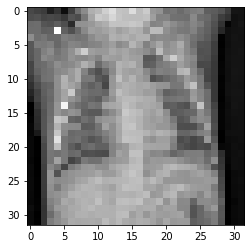

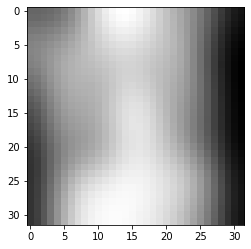

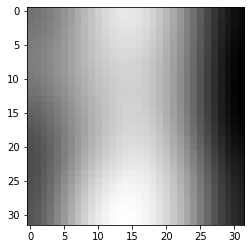

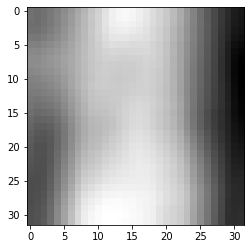

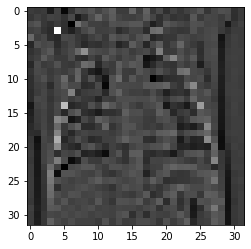

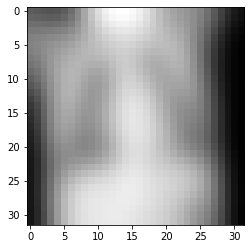

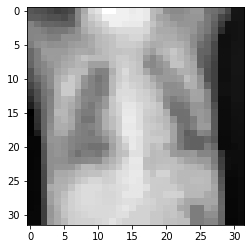

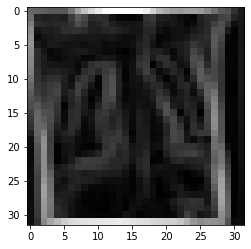

In [ ]:
from scipy import ndimage
X_new,y_new  = [], []
for class_number, class_name in enumerate(name_classes):    # Number of directories
  for filename in glob.glob(f'./chest_xray_512/{class_name}/*.jpg'):
    im = image.load_img(filename, target_size=[img_rows, img_cols], color_mode = 'grayscale')
    X_new.append(image.img_to_array(im))
    y_new.append(class_number)
    break
  break
#Imagen original
X_new=np.array(X_new)
plt.imshow(X_new[0,:,:,0])
plt.gray()
plt.show()

#Desenfoque/suavizado

##Filtro gaussiano
from scipy import misc
###Difunado level
a = ndimage.gaussian_filter(X[0], sigma=3)
X_new=np.insert(X_new,len(X_new),a,axis = 0) 
#plt.imshow(imagen_difuminada)
plt.imshow(X_new[len(X_new)-1,:,:,0])
plt.gray()
plt.show()

###Difunado maximo
a = ndimage.gaussian_filter(X[0], sigma=5)
X_new=np.insert(X_new,len(X_new),a,axis = 0) 
plt.imshow(X_new[len(X_new)-1,:,:,0])
plt.gray()
plt.show()

##Filtro uniforme
a = ndimage.uniform_filter(X[0], size=11)
X_new=np.insert(X_new,len(X_new),a,axis = 0) 
plt.imshow(X_new[len(X_new)-1,:,:,0])
plt.gray()
plt.show()

#Enfoque/refinamiento (sharpening)
##Enfocar imagen borrosa y Aproximación del laplaciano (marcar bordes)
a =X[0] #ndimage.gaussian_filter(X[0], 3)
##Aproximación del laplaciano
filter_a = ndimage.gaussian_filter(a, 1)
alpha = 30
a = a + alpha * (a - filter_a)
X_new=np.insert(X_new,len(X_new),a,axis = 0) 
plt.imshow(X_new[len(X_new)-1,:,:,0])
plt.gray()
plt.show()


#Reduciendo ruido
##filtro gaussiano suaviza la imagen eliminando el ruido... además de los bordes
a =ndimage.gaussian_filter(X[0], 2)
X_new=np.insert(X_new,len(X_new),a,axis = 0) 
plt.imshow(X_new[len(X_new)-1,:,:,0])
plt.gray()
plt.show()

##filtro de mediana conserva mejor los bordes
a =ndimage.median_filter(X[0], 3)
X_new=np.insert(X_new,len(X_new),a,axis = 0) 
plt.imshow(X_new[len(X_new)-1,:,:,0])
plt.gray()
plt.show()


#Extraer Patrones

##Operador Gradiente sobel
a =ndimage.median_filter(X[0], 3)
sx = ndimage.sobel(a, axis=0, mode='constant')
sy = ndimage.sobel(a, axis=1, mode='constant')
a = np.hypot(sx, sy)
X_new=np.insert(X_new,len(X_new),a,axis = 0) 
plt.imshow(X_new[len(X_new)-1,:,:,0])
plt.gray()
plt.show()


# Desenfoque/Suavizado Filtro Gaussiano Difuminacion Leve

In [ ]:
def DifuminaLeve(X_data):
  X_new_data=[]
  for i in range(0,(len(X_data)-1)):
    a = ndimage.gaussian_filter(X_data[i], sigma=3)
    X_new_data.append(a)
    break
  #X_new_data=np.array(X_new_data)
  for i in range(1,(len(X_data))):
    a = ndimage.gaussian_filter(X_data[i], sigma=3)
    #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0) 
    X_new_data.append(a) 
  return np.array(X_new_data)


# Desenfoque/Suavizado Filtro Gaussiano Difuminacion Maximo




In [ ]:
def DifuminaMax(X_data):
  X_new_data=[]
  for i in range(0,(len(X_data)-1)):
    a = ndimage.gaussian_filter(X_data[i], sigma=5)
    X_new_data.append(a)
    break
  #X_new_data=np.array(X_new_data)
  for i in range(1,(len(X_data))):
    a = ndimage.gaussian_filter(X_data[i], sigma=5)
    #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0) 
    X_new_data.append(a) 
  return np.array(X_new_data)

#Desenfoque/Suavizado Filtro uniforme

In [ ]:
def FiltroUniforme(X_data):
  X_new_data=[]
  for i in range(0,(len(X_data)-1)):
    a = ndimage.uniform_filter(X_data[i], size=11)
    X_new_data.append(a)
    break
  #X_new_data=np.array(X_new_data)
  for i in range(1,(len(X_data))):
    a = ndimage.uniform_filter(X_data[i], size=11)
    #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0) 
    X_new_data.append(a) 
  return np.array(X_new_data)

# Enfoque/refinamiento (sharpening) Aproximación del laplaciano (marcar bordes)

In [ ]:
def Sharpering(X_data):
  X_new_data=[]
  for i in range(0,(len(X_data)-1)):
    a =X_data[i] #ndimage.gaussian_filter(X_data[i], 3)
    ##Aproximación del laplaciano
    filter_a = ndimage.gaussian_filter(a, 1)
    alpha = 30
    a = a + alpha * (a - filter_a)
    X_new_data.append(a)
    break
  #X_new_data=np.array(X_new_data)
  for i in range(1,(len(X_data))):
    a =X_data[i] #ndimage.gaussian_filter(X_data[i], 3)
    ##Aproximación del laplaciano
    filter_a = ndimage.gaussian_filter(a, 1)
    alpha = 30
    a = a + alpha * (a - filter_a)
    #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0) 
    X_new_data.append(a) 
  return np.array(X_new_data)

#Reduciendo ruido filtro gaussiano

In [ ]:
def RuidoGauss(X_data):
  X_new_data=[]
  for i in range(0,(len(X_data)-1)):
    a = ndimage.gaussian_filter(X_data[i], 2)
    X_new_data.append(a)
    break
  #X_new_data=np.array(X_new_data)
  for i in range(1,(len(X_data))):
    a = ndimage.gaussian_filter(X_data[i], 2)
    #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0) 
    X_new_data.append(a) 
  return np.array(X_new_data)

#Reduciendo ruido  filtro mediana

In [ ]:
def RuidoMed(X_data):
  X_new_data=[]
  for i in range(0,(len(X_data)-1)):
    a = ndimage.median_filter(X[0], 3)
    X_new_data.append(a)
    break
  #X_new_data=np.array(X_new_data)
  for i in range(1,(len(X_data))):
    a = ndimage.median_filter(X_data[i], 3)
    #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0) 
    X_new_data.append(a) 
  return np.array(X_new_data)

#Extraer Patrones Operador Gradiente sobel

In [ ]:
def Sobel(X_data):
  X_new_data=[]
  for i in range(0,(len(X_data)-1)):
    a =ndimage.median_filter(X_data[i], 3)
    sx = ndimage.sobel(a, axis=0, mode='constant')
    sy = ndimage.sobel(a, axis=1, mode='constant')
    a = np.hypot(sx, sy)
    X_new_data.append(a)
    break
  #X_new_data=np.array(X_new_data)
  for i in range(1,(len(X_data))):
    a =ndimage.median_filter(X_data[i], 3)
    sx = ndimage.sobel(a, axis=0, mode='constant')
    sy = ndimage.sobel(a, axis=1, mode='constant')
    a = np.hypot(sx, sy)
    #X_new_data=np.insert(X_new_data,len(X_new_data),a,axis = 0) 
    X_new_data.append(a) 
  return np.array(X_new_data)

In [ ]:
#X_normal,y_normal,shape_ofdata=load_data()
#Preprocesar
#X_Sobel=Sobel(X_normal)

# Crear Los diferentes Conjuntos

(5856, 32, 32, 1)


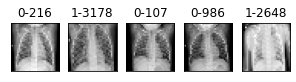

(5856, 32, 32, 1)


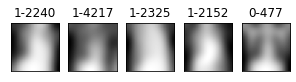

(5856, 32, 32, 1)


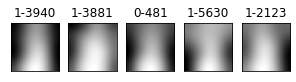

(5856, 32, 32, 1)


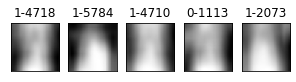

(5856, 32, 32, 1)


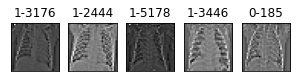

(5856, 32, 32, 1)


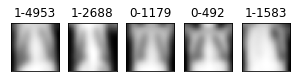

(5856, 32, 32, 1)


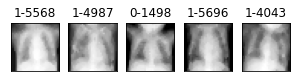

(5856, 32, 32, 1)


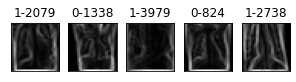

In [ ]:
#DATOS INICIALES A DEMAS DE FILTROS DE PREPROCESAMIENTOS
X_normal,y_normal,shape_ofdata=load_data()
#Preprocesar
X_DifuminaLeve=DifuminaLeve(X_normal)
X_DifuminaMax=DifuminaMax(X_normal)
X_FiltroUniforme=FiltroUniforme(X_normal)
X_Sharpering=Sharpering(X_normal)
X_RuidoGauss=RuidoGauss(X_normal)
X_RuidoMed=RuidoMed(X_normal)
X_Sobel=Sobel(X_normal)

print(X_normal.shape)
plot_symbols(X_normal,y,n=5)
print(X_DifuminaLeve.shape)
plot_symbols(X_DifuminaLeve,y,n=5)
print(X_DifuminaMax.shape)
plot_symbols(X_DifuminaMax,y,n=5)
print(X_FiltroUniforme.shape)
plot_symbols(X_FiltroUniforme,y,n=5)
print(X_Sharpering.shape)
plot_symbols(X_Sharpering,y,n=5)
print(X_RuidoGauss.shape)
plot_symbols(X_RuidoGauss,y,n=5)
print(X_RuidoMed.shape)
plot_symbols(X_RuidoMed,y,n=5)
print(X_Sobel.shape)
plot_symbols(X_Sobel,y,n=5)

#Generar division para entrenamiento y test
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.25, random_state=123)
#Preprocesar imagenes del entrenamiento
X_train_DifuminaLeve=DifuminaLeve(X_train_normal)
X_train_DifuminaMax=DifuminaMax(X_train_normal)
X_train_FiltroUniforme=FiltroUniforme(X_train_normal)
X_train_Sharpering=Sharpering(X_train_normal)
X_train_RuidoGauss=RuidoGauss(X_train_normal)
X_train_RuidoMed=RuidoMed(X_train_normal)
X_train_Sobel=Sobel(X_train_normal)

#Aumentado(datagenerator) de datos de entrenamiento
X_train_normal_aumented, y_train_aumented = datagenerator_augmentation(X_train_normal,X_test,y_train,y_test,batch_size)
#Preprocesar imagenes aumentados del entrenamiento
X_train_DifuminaLeve_aumented=DifuminaLeve(X_train_normal_aumented)
X_train_DifuminaMax_aumented=DifuminaMax(X_train_normal_aumented)
X_train_FiltroUniforme_aumented=FiltroUniforme(X_train_normal_aumented)
X_train_Sharpering_aumented=Sharpering(X_train_normal_aumented)
X_train_RuidoGauss_aumented=RuidoGauss(X_train_normal_aumented)
X_train_RuidoMed_aumented=RuidoMed(X_train_normal_aumented)
X_train_Sobel_aumented=Sobel(X_train_normal_aumented)



Counter({0: 4749, 1: 4273})
(9022, 32, 32, 1)


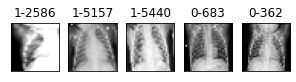

In [ ]:
#Aumento datos con equilibrio

#DATOS INICIALES Equilibrados
X_normal_equalized,y_normal_equalized,X_normal_equalized2,y_normal_equalized2=load_data_Equalized()
#1583 4273
#1583*3=4700 mas o menos, se equilibra
X_normal_equalized,y_normal_equalized = datagenerator_augmentation2(X_normal_equalized,X_test,y_normal_equalized,y_test,batch_size)
X_normal_equalized=np.append(X_normal_equalized,X_normal_equalized2, axis=0)
y_normal_equalized=np.append(y_normal_equalized,y_normal_equalized2, axis=0)
print(collections.Counter(y_normal_equalized))
print(X_normal_equalized.shape)
plot_symbols(X_normal_equalized,y,n=5)
#FILTROS DE PREPROCESAMIENTOS
X_DifuminaLeve_equalized=DifuminaLeve(X_normal_equalized)
X_DifuminaMax_equalized=DifuminaMax(X_normal_equalized)
X_FiltroUniforme_equalized=FiltroUniforme(X_normal_equalized)
X_Sharpering_equalized=Sharpering(X_normal_equalized)
X_RuidoGauss_equalized=RuidoGauss(X_normal_equalized)
X_RuidoMed_equalized=RuidoMed(X_normal_equalized)
X_Sobel_equalized=Sobel(X_normal_equalized)

#Generar division para entrenamiento y test
X_train_normal_equalized, X_test_equalized, y_train_equalized, y_test_equalized = train_test_split(X_normal_equalized, y_normal_equalized, test_size=0.25, random_state=123)
#Preprocesar imagenes del entrenamiento
X_train_DifuminaLeve_equalized=DifuminaLeve(X_train_normal_equalized)
X_train_DifuminaMax_equalized=DifuminaMax(X_train_normal_equalized)
X_train_FiltroUniforme_equalized=FiltroUniforme(X_train_normal_equalized)
X_train_Sharpering_equalized=Sharpering(X_train_normal_equalized)
X_train_RuidoGauss_equalized=RuidoGauss(X_train_normal_equalized)
X_train_RuidoMed_equalized=RuidoMed(X_train_normal_equalized)
X_train_Sobel_equalized=Sobel(X_train_normal_equalized)

#Aumentado(datagenerator) de datos de entrenamiento
X_train_normal_aumented_equalized, y_train_aumented_equalized = datagenerator_augmentation(X_train_normal_equalized,X_test_equalized,y_train_equalized,y_test_equalized,batch_size)
#Preprocesar imagenes aumentados del entrenamiento
X_train_DifuminaLeve_aumented_equalized=DifuminaLeve(X_train_normal_aumented_equalized)
X_train_DifuminaMax_aumented_equalized=DifuminaMax(X_train_normal_aumented_equalized)
X_train_FiltroUniforme_aumented_equalized=FiltroUniforme(X_train_normal_aumented_equalized)
X_train_Sharpering_aumented_equalized=Sharpering(X_train_normal_aumented_equalized)
X_train_RuidoGauss_aumented_equalized=RuidoGauss(X_train_normal_aumented_equalized)
X_train_RuidoMed_aumented_equalized=RuidoMed(X_train_normal_aumented_equalized)
X_train_Sobel_aumented_equalized=Sobel(X_train_normal_aumented_equalized)

(5856, 32, 32, 1) samples
(5856,) labels
Counter({1: 2780, 0: 1583, 2: 1493})
x_train (4392, 32, 32, 1) x_test (1464, 32, 32, 1)
y_train (4392,) y_test (1464,)
(5856, 32, 32, 1)


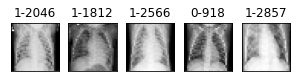

In [ ]:
#Datos para seleccion de 3
X3_normal, y3_normal, input_shape3 = load_data_tres()
#X3/=255
print(X3_normal.shape, 'samples')
print(y3_normal.shape, 'labels')
print(collections.Counter(y3))

X_normal_train3, X_normal_test3, y_normal_train3, y_normal_test3 = train_test_split(X3_normal, y3_normal, test_size=0.25, random_state=123)

print(f'x_train {X_normal_train3.shape} x_test {X_normal_test3.shape}')
print(f'y_train {y_normal_train3.shape} y_test {y_normal_test3.shape}')
print(X3_normal.shape)
plot_symbols(X3_normal,y,n=5)

# PROBANDO MODELO 0

In [ ]:
modelToEvaluate=cnn_model(input_shape)
modelActual='modelo0'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....


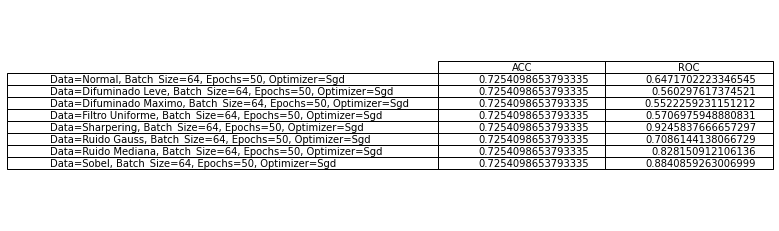

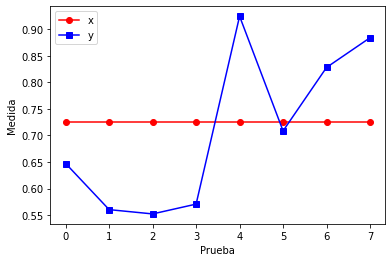

In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

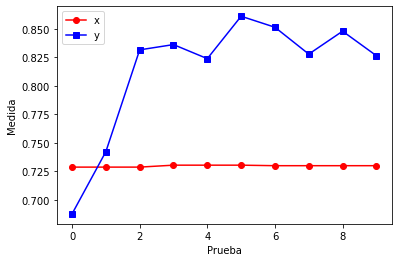

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

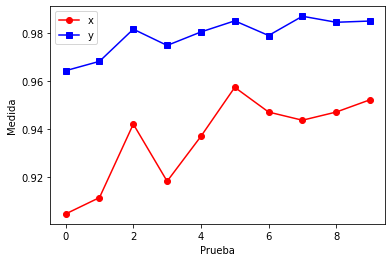

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 1

In [ ]:
modelToEvaluate=cnn_model_Tanh(input_shape)
modelActual='modelo1'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 2

In [ ]:
modelToEvaluate=cnn_model_Relu(input_shape)
modelActual='modelo2'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 3

In [ ]:
modelToEvaluate=cnn_model_LeakyRelu(input_shape)
modelActual='modelo3'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 4

In [ ]:
modelToEvaluate=cnn_model_AlexNet(input_shape)
modelActual='modelo4'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 5

In [ ]:
modelToEvaluate=cnn_model_5_Random(input_shape)
modelActual='modelo5'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 6

In [ ]:
modelToEvaluate=cnn_model_6_Random(input_shape)
modelActual='modelo10'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 7

In [ ]:
modelToEvaluate=cnn_model_VGG(input_shape)
modelActual='modelo10'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 8

In [ ]:
modelToEvaluate=cnn_model_VGG_Trained(input_shape)
modelActual='modelo10'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 9

In [ ]:
modelToEvaluate=cnn_model_9_Random(input_shape)
modelActual='modelo10'

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_sg,modelo0_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_sg
dataroc=modelo0_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_20_ad,modelo0_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_20_ad
dataroc=modelo0_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_sgd,modelo0_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_sgd
dataroc=modelo0_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_64_5_ad,modelo0_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_64_5_ad
dataroc=modelo0_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_64_5_ad,modelo0_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_64_5_ad
dataroc=modelo0_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cv_nd_32_5_ad,modelo0_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cv_nd_32_5_ad
dataroc=modelo0_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

# PROBANDO MODELO 10

In [ ]:
modelToEvaluate=cnn_model_10_Random(input_shape)

## Variando Datos Completos

In [ ]:
#PROBANDO MODELO 0

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaLeve,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_DifuminaMax,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_FiltroUniforme,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sharpering,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoGauss,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_RuidoMed,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_Sobel,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 48/50
62/62 - 2s - loss: 0.5814 - accuracy: 0.7305 - val_loss: 0.5746 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 49/50
62/62 - 2s - loss: 0.5813 - accuracy: 0.7305 - val_loss: 0.5747 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
Epoch 50/50
62/62 - 2s - loss: 0.5805 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7364 - 2s/epoch - 36ms/step
23/23 [==============================] - 0s 19ms/step - loss: 0.5875 - accuracy: 0.7254
loss: 0.59 acc: 0.73
AUC 0.8841


In [ ]:
print('VARIANDO LOS DATOS EN SU TOTALIDAD AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_nd_64_20_ad,modelo0_roc_nd_64_20_ad],
      [modelo0_acc_dl_64_20_ad,modelo0_roc_dl_64_20_ad],
      [modelo0_acc_dm_64_20_ad,modelo0_roc_dm_64_20_ad],
      [modelo0_acc_fu_64_20_ad,modelo0_roc_fu_64_20_ad],
      [modelo0_acc_sh_64_20_ad,modelo0_roc_sh_64_20_ad],
      [modelo0_acc_rg_64_20_ad,modelo0_roc_rg_64_20_ad],
      [modelo0_acc_rm_64_20_ad,modelo0_roc_rm_64_20_ad],
      [modelo0_acc_sb_64_20_ad,modelo0_roc_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_nd_64_20_ad,
      modelo0_acc_dl_64_20_ad,
      modelo0_acc_dm_64_20_ad,
      modelo0_acc_fu_64_20_ad,
      modelo0_acc_sh_64_20_ad,
      modelo0_acc_rg_64_20_ad,
      modelo0_acc_rm_64_20_ad,
      modelo0_acc_sb_64_20_ad]
dataroc=[modelo0_roc_nd_64_20_ad,
      modelo0_roc_dl_64_20_ad,
      modelo0_roc_dm_64_20_ad,
      modelo0_roc_fu_64_20_ad,
      modelo0_roc_sh_64_20_ad,
      modelo0_roc_rg_64_20_ad,
      modelo0_roc_rm_64_20_ad,
      modelo0_roc_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Variando Datos De Entrenamiento


In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel, X_test_normal, y_train_normal, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTW AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad],
      [modelo0_acc_t_dl_64_20_ad,modelo0_roc_t_dl_64_20_ad],
      [modelo0_acc_t_dm_64_20_ad,modelo0_roc_t_dm_64_20_ad],
      [modelo0_acc_t_fu_64_20_ad,modelo0_roc_t_fu_64_20_ad],
      [modelo0_acc_t_sh_64_20_ad,modelo0_roc_t_sh_64_20_ad],
      [modelo0_acc_t_rg_64_20_ad,modelo0_roc_t_rg_64_20_ad],
      [modelo0_acc_t_rm_64_20_ad,modelo0_roc_t_rm_64_20_ad],
      [modelo0_acc_t_sb_64_20_ad,modelo0_roc_t_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_t_nd_64_20_ad,
      modelo0_acc_t_dl_64_20_ad,
      modelo0_acc_t_dm_64_20_ad,
      modelo0_acc_t_fu_64_20_ad,
      modelo0_acc_t_sh_64_20_ad,
      modelo0_acc_t_rg_64_20_ad,
      modelo0_acc_t_rm_64_20_ad,
      modelo0_acc_t_sb_64_20_ad]
dataroc=[modelo0_roc_t_nd_64_20_ad,
      modelo0_roc_t_dl_64_20_ad,
      modelo0_roc_t_dm_64_20_ad,
      modelo0_roc_t_fu_64_20_ad,
      modelo0_roc_t_sh_64_20_ad,
      modelo0_roc_t_rg_64_20_ad,
      modelo0_roc_t_rm_64_20_ad,
      modelo0_roc_t_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## AUMENTANDO DATOS DEL ENTRENAMIENTO Y APLICANDOLE FILTROS ADICIONALES

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_t_nd_64_20_ad,modelo0_roc_t_nd_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_normal_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaLeve_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_DifuminaMax_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_FiltroUniforme_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sharpering_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoGauss_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_RuidoMed_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad =(
  CompileEvaluateTrain(modelToEvaluate,X_train_Sobel_aumented, X_test_normal, y_train_aumented, y_test_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))


In [ ]:
print('AUMENTANDO LOS DATOS DE ENTRENAMIENTO SOLAMENTE AÑADIENDOLES DIFUMINACION, CONTRASTE....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_ta_nd_64_20_ad,modelo0_roc_ta_nd_64_20_ad],
      [modelo0_acc_ta_dl_64_20_ad,modelo0_roc_ta_dl_64_20_ad],
      [modelo0_acc_ta_dm_64_20_ad,modelo0_roc_ta_dm_64_20_ad],
      [modelo0_acc_ta_fu_64_20_ad,modelo0_roc_ta_fu_64_20_ad],
      [modelo0_acc_ta_sh_64_20_ad,modelo0_roc_ta_sh_64_20_ad],
      [modelo0_acc_ta_rg_64_20_ad,modelo0_roc_ta_rg_64_20_ad],
      [modelo0_acc_ta_rm_64_20_ad,modelo0_roc_ta_rm_64_20_ad],
      [modelo0_acc_ta_sb_64_20_ad,modelo0_roc_ta_sb_64_20_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Leve, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Difuminado Maximo, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Filtro Uniforme, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sharpering, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Gauss, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Ruido Mediana, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Sobel, Batch_Size=64, Epochs=20, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_ta_nd_64_20_ad,
      modelo0_acc_ta_dl_64_20_ad,
      modelo0_acc_ta_dm_64_20_ad,
      modelo0_acc_ta_fu_64_20_ad,
      modelo0_acc_ta_sh_64_20_ad,
      modelo0_acc_ta_rg_64_20_ad,
      modelo0_acc_ta_rm_64_20_ad,
      modelo0_acc_ta_sb_64_20_ad]
dataroc=[modelo0_roc_ta_nd_64_20_ad,
      modelo0_roc_ta_dl_64_20_ad,
      modelo0_roc_ta_dm_64_20_ad,
      modelo0_roc_ta_fu_64_20_ad,
      modelo0_roc_ta_sh_64_20_ad,
      modelo0_roc_ta_rg_64_20_ad,
      modelo0_roc_ta_rm_64_20_ad,
      modelo0_roc_ta_sb_64_20_ad]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO EPOCHS Y OPTIMIZADOR MISMO DATO INICIAL

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_sg,modelo0_roc_nd_64_50_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_50_ad,modelo0_roc_nd_64_50_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=50,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_sg,modelo0_roc_nd_64_30_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_30_ad,modelo0_roc_nd_64_30_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=30,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_sg,modelo0_roc_nd_64_20_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_20_ad,modelo0_roc_nd_64_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_sg,modelo0_roc_nd_64_10_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_10_ad,modelo0_roc_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_sg,modelo0_roc_nd_64_5_sg =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd'))

#Variando Datos(difunar,Filtro Uniforme....)
modelo0_acc_e_nd_64_5_ad,modelo0_roc_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_e_nd_64_50_sg,modelo0_acc_e_nd_64_50_sg],
      [modelo0_acc_e_nd_64_50_ad,modelo0_acc_e_nd_64_50_ad],
      [modelo0_acc_e_nd_64_30_sg,modelo0_acc_e_nd_64_30_sg],
      [modelo0_acc_e_nd_64_30_ad,modelo0_acc_e_nd_64_30_ad],
      [modelo0_acc_e_nd_64_20_sg,modelo0_acc_e_nd_64_20_sg],
      [modelo0_acc_e_nd_64_20_ad,modelo0_acc_e_nd_64_20_ad],
      [modelo0_acc_e_nd_64_10_sg,modelo0_acc_e_nd_64_10_sg],
      [modelo0_acc_e_nd_64_10_ad,modelo0_acc_e_nd_64_10_ad],
      [modelo0_acc_e_nd_64_5_sg,modelo0_acc_e_nd_64_5_sg],
      [modelo0_acc_e_nd_64_5_ad,modelo0_acc_e_nd_64_5_ad]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=50, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=30, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Sgd",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad]
dataroc=[modelo0_acc_e_nd_64_50_sg,
      modelo0_acc_e_nd_64_50_ad,
      modelo0_acc_e_nd_64_30_sg,
      modelo0_acc_e_nd_64_30_ad,
      modelo0_acc_e_nd_64_20_sg,
      modelo0_acc_e_nd_64_20_ad,
      modelo0_acc_e_nd_64_10_sg,
      modelo0_acc_e_nd_64_10_ad,
      modelo0_acc_e_nd_64_5_sg,
      modelo0_acc_e_nd_64_5_ad,
      ]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## VARIANDO BATCH SIZE Y EPOCHS

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo10_acc_b_nd_64_20_ad,modelo10_roc_b_nd_64_20_ad =(
   CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_20_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=20,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal, y_test_normal,batch_size_p=64,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_10_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=10,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_32_20_ad,modelo0_roc_b_nd_32_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam'))

#Variando Datos(difunar,Filtro Uniforme....) solo en el enrrenamiento Se mantiene el original en el test
modelo0_acc_b_nd_16_20_ad,modelo0_roc_b_nd_16_5_ad =(
  CompileEvaluate(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=16,epochs_p=5,optimizer_p='adam'))


In [ ]:
print('VARIANDO LOS DATOS DE EPOCHS Y OPTIMIZADOR....')
fig, ax =plt.subplots(1,1)

data=[[modelo0_acc_b_nd_64_20_ad,modelo0_roc_b_nd_64_20_ad],
      [modelo0_acc_e_nd_32_20_ad,modelo0_acc_e_nd_32_20_ad],
      [modelo0_acc_e_nd_16_20_sg,modelo0_acc_e_nd_16_20_sg],
      [modelo0_acc_b_nd_64_10_ad,modelo0_roc_b_nd_64_10_ad],
      [modelo0_acc_e_nd_32_10_ad,modelo0_acc_e_nd_32_10_ad],
      [modelo0_acc_e_nd_16_10_sg,modelo0_acc_e_nd_16_10_sg],
      [modelo0_acc_b_nd_64_5_ad,modelo0_roc_b_nd_64_5_ad],
      [modelo0_acc_e_nd_32_5_ad,modelo0_acc_e_nd_32_5_ad],
      [modelo0_acc_e_nd_16_5_sg,modelo0_acc_e_nd_16_5_sg]]


column_labels=["ACC", "ROC"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Data=Normal, Batch_Size=64, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=20, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=10, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=64, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=32, Epochs=5, Optimizer=Adam",
                                                            "Data=Normal, Batch_Size=16, Epochs=5, Optimizer=Adam"],loc="center")

plt.show()

dataaccurracy=[modelo0_acc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_acc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_acc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
dataroc=[modelo0_roc_b_nd_64_20_ad,
      modelo0_acc_e_nd_32_20_ad,
      modelo0_acc_e_nd_16_20_sg,
      modelo0_roc_b_nd_64_10_ad,
      modelo0_acc_e_nd_32_10_ad,
      modelo0_acc_e_nd_16_10_sg,
      modelo0_roc_b_nd_64_5_ad,
      modelo0_acc_e_nd_32_5_ad,
      modelo0_acc_e_nd_16_5_sg]
ImprimeGraficaDoble(dataaccurracy,dataroc)

## CV VARIANDO EPOCHS BATCH SIZE OPTIMIZER AUMENTAR DATOS...

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 
modelo10_acc_cv_nd_64_20_sg,modelo10_roc_cv_nd_64_20_sg =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo10_acc_cv_nd_64_20_sg
dataroc=modelo10_roc_cv_nd_64_20_sg
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 
modelo10_acc_cv_nd_64_20_ad,modelo10_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo10_acc_cv_nd_64_20_ad
dataroc=modelo10_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 
modelo10_acc_cv_nd_64_20_ad,modelo10_roc_cv_nd_64_20_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=20,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo10_acc_cv_nd_64_20_ad
dataroc=modelo10_roc_cv_nd_64_20_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 
modelo10_acc_cv_nd_64_5_sgd,modelo10_roc_cv_nd_64_5_sgd =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='sgd')

In [ ]:
dataaccurracy=modelo10_acc_cv_nd_64_5_sgd
dataroc=modelo10_roc_cv_nd_64_5_sgd
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 
modelo10_acc_cv_nd_64_5_ad,modelo10_roc_cv_nd_64_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo10_acc_cv_nd_64_5_ad
dataroc=modelo10_roc_cv_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 
modelo10_acc_cvda_nd_64_5_ad,modelo10_roc_cvda_nd_64_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=64,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo10_acc_cvda_nd_64_5_ad
dataroc=modelo10_roc_cvda_nd_64_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 
modelo10_acc_cv_nd_32_5_ad,modelo10_roc_cv_nd_32_5_ad =CVDiez(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

In [ ]:
dataaccurracy=modelo10_acc_cv_nd_32_5_ad
dataroc=modelo10_roc_cv_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

In [ ]:
#PROBANDO MODELO 10

#Pruebas iniciales 
modelo0_acc_cvda_nd_32_5_ad,modelo0_roc_cvda_nd_32_5_ad =CVDiezDA(modelToEvaluate,X_data=X_normal,y_data=y_normal,batch_size_p=32,epochs_p=5,optimizer_p='adam')

Epoch 1/5
593/593 - 2s - loss: 0.5108 - accuracy: 0.7770 - val_loss: 0.5579 - val_accuracy: 0.7438 - 2s/epoch - 4ms/step
Epoch 2/5
593/593 - 2s - loss: 0.5068 - accuracy: 0.7807 - val_loss: 0.5651 - val_accuracy: 0.7339 - 2s/epoch - 3ms/step
Epoch 3/5
593/593 - 2s - loss: 0.5072 - accuracy: 0.7781 - val_loss: 0.5654 - val_accuracy: 0.7372 - 2s/epoch - 3ms/step
Epoch 4/5
593/593 - 2s - loss: 0.5053 - accuracy: 0.7795 - val_loss: 0.5596 - val_accuracy: 0.7538 - 2s/epoch - 3ms/step
Epoch 5/5
593/593 - 2s - loss: 0.5058 - accuracy: 0.7789 - val_loss: 0.5552 - val_accuracy: 0.7472 - 2s/epoch - 3ms/step
19/19 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.9266
loss for the fold 1: 0.3261 acc for the fold 1: 0.9266
AUC for the fold 1: 0.9589
Epoch 1/5
593/593 - 2s - loss: 0.5116 - accuracy: 0.7796 - val_loss: 0.5802 - val_accuracy: 0.7220 - 2s/epoch - 3ms/step
Epoch 2/5
593/593 - 2s - loss: 0.5132 - accuracy: 0.7785 - val_loss: 0.6512 - val_accuracy: 0.7291 - 2s/e

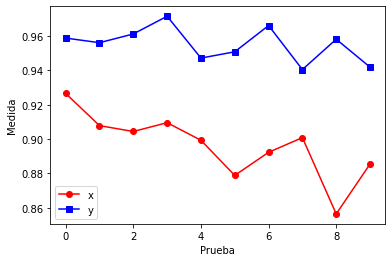

In [ ]:
dataaccurracy=modelo0_acc_cvda_nd_32_5_ad
dataroc=modelo0_roc_cvda_nd_32_5_ad
ImprimeGraficaDoble(dataaccurracy,dataroc)

## Comparativa etadistica CV Mismo Modelo